# K-NN for Wine Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime

## Data Loading and Cleaning

In [2]:
from sklearn import datasets
df = pd.read_csv('winequality-red.csv')

def myfunction(x):
    if x > 5:
        return 1
    else:
        return 0
df['quality'] = df['quality'].apply(myfunction)
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,1


# 1. K-NN with All Features

In [3]:
X = df.iloc[:,:11]
y = df.iloc[:,-1]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


## Setting value of k

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

begin_time = datetime.datetime.now()

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42,test_size=0.25)

# Run from k = 1 to 11 and record testing accuracy
k_range = np.arange(1,12,2)
scores = {}
scores_list = []

for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
    
#print(y_pred)
#print(y_test)  

print('k = ', k_range)
print('Accuracy score: ', scores_list)
print('Time for processing: ', datetime.datetime.now()-begin_time)

k =  [ 1  3  5  7  9 11]
Accuracy score:  [0.6475, 0.62, 0.62, 0.5975, 0.605, 0.6025]
Time for processing:  0:00:00.129926


## Plot testing accuracy of value of k = 1 to k = 11 (odd numbers only)

Text(0, 0.5, 'Testing Accuracy')

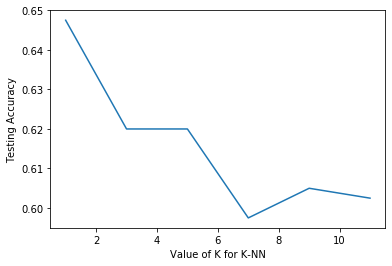

In [5]:
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for K-NN')
plt.ylabel('Testing Accuracy')

## Setting k = 5 
Accuracy score is the same when k = 3 and k = 5. 
To avoid setting k too low or too high, I have chosen the mid-point of k = 5. This is also the default number within scikit-learn in Python.

In [6]:
from sklearn.model_selection import train_test_split

begin_time = datetime.datetime.now()

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42,test_size=0.25)

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 5) 

# Train model to the dataset. The training set is all the data points.
knn_model.fit(X_train, y_train) 

y_pred = knn_model.predict(X_test)

#print(y_pred)
#print(y_test)

from sklearn.metrics import accuracy_score

print('Accuracy score for K-NN (all features) with k = 5: ', accuracy_score(y_test, y_pred))
print('Training Duration (1 run): ', datetime.datetime.now()-begin_time)

Accuracy score for K-NN (all features) with k = 5:  0.62
Training Duration (1 run):  0:00:00.037978


## Confusion Matrix for K-NN (all Features) and k = 5

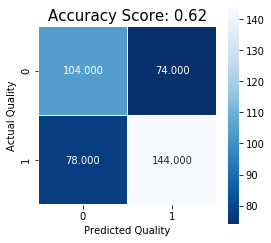

In [7]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Quality');
plt.xlabel('Predicted Quality');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);

## Compute average Training Duration and accuracy score over 100 runs for K-NN (all features) and k = 5

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = df.iloc[:,:11] 
y = df.iloc[:,-1] 

def knnAll():
    begin_time = datetime.datetime.now()
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42,test_size=0.25)

    knn_model = KNeighborsClassifier(n_neighbors = 5) 
    knn_model.fit(X_train, y_train) 
    
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    timespent=datetime.datetime.now()-begin_time
    return accuracy, timespent


runs = 100 #to loop through and get average timing to be more accurate
totaltime = datetime.timedelta()
totalaccuracy =0.00
for i in np.arange(0, runs, 1):
    i, j = knnAll()
    totaltime = totaltime + j
    totalaccuracy = totalaccuracy + i   
    
print('Average Accuracy Score for K-NN (all features) with k = 5: ', totalaccuracy/runs)
print('Average Training Duration for K-NN (all features) with k = 5: ', totaltime/runs)


Average Accuracy Score for K-NN (all features) with k = 5:  0.6199999999999989
Average Training Duration for K-NN (all features) with k = 5:  0:00:00.021648


# 2. K-NN with Four Features (Pearson Correlation)

## Setting k = 5

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X1 = df.loc[:,['volatile acidity','total sulfur dioxide', 'sulphates', 'alcohol']]
y1 = df.iloc[:,-1]

begin_time = datetime.datetime.now()

# Splitting the dataset into the Training set and Test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 42,test_size=0.25)

knn1_model = KNeighborsClassifier(n_neighbors = 5) 

knn1_model.fit(X1_train, y1_train)

y1_pred = knn1_model.predict(X1_test)

#print(y1_pred)
#print(y1_test)

print('Accuracy score for K-NN (4 features) with k = 5: ', accuracy_score(y1_test, y1_pred))
print('Training Duration (1 run): ', datetime.datetime.now()-begin_time)

Accuracy score for K-NN (4 features) with k = 5:  0.675
Training Duration (1 run):  0:00:00.044974


## Confusion Matrix for K-NN (4 features) and k = 5

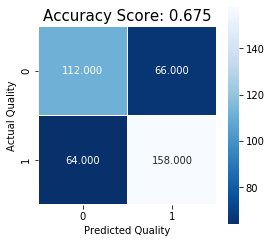

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Quality');
plt.xlabel('Predicted Quality');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y1_test, y1_pred))
plt.title(all_sample_title, size = 15);

## Compute average training duration and accuracy score over 100 runs for K-NN (4 features) and k = 5

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X1 = df.loc[:,['volatile acidity','total sulfur dioxide', 'sulphates', 'alcohol']]
y1 = df.iloc[:,-1]

def knn4():
    begin_time = datetime.datetime.now()
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 42,test_size=0.25)

    knn_model = KNeighborsClassifier(n_neighbors = 5) 
    knn_model.fit(X1_train, y1_train) 
    
    y1_pred = knn_model.predict(X1_test)
    accuracy = accuracy_score(y1_test, y1_pred)
    timespent = datetime.datetime.now()-begin_time
    return accuracy, timespent

runs = 100 #to loop through and get average timing to be more accurate
totaltime = datetime.timedelta()
totalaccuracy =0.00
for i in np.arange(0, runs, 1):
    i, j = knn4()
    totaltime = totaltime + j
    totalaccuracy = totalaccuracy + i   
    
print('Average Accuracy Score for K-NN (4 features) with k = 5: ', totalaccuracy/runs)    
print('Average Training Duration for K-NN (4 features) with k = 5: ', totaltime/runs)

Average Accuracy Score for K-NN (4 features) with k = 5:  0.6749999999999987
Average Training Duration for K-NN (4 features) with k = 5:  0:00:00.018739


# 3. K-NN with PCA (6 Components) and k = 5

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x = StandardScaler().fit_transform(df.iloc[:, 0:-1])
pca = PCA(n_components = 6)

X2 = pca.fit_transform(x)
y2 = df['quality'] 

begin_time = datetime.datetime.now()
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 42,test_size=0.25)

knn2_model = KNeighborsClassifier(n_neighbors = 5) 
knn2_model.fit(X2_train, y2_train) 
y2_pred = knn2_model.predict(X2_test)

from sklearn.metrics import accuracy_score

print('Accuracy score for K-NN with PCA (6 components) and k = 5: ', accuracy_score(y2_test, y2_pred))
print('Training Duration (1 run): ', datetime.datetime.now()-begin_time)

Accuracy score for K-NN with PCA (6 components) and k = 5:  0.6825
Training Duration (1 run):  0:00:00.029981


## Confusion Matrix for K-NN with PCA (6 components) and k = 5

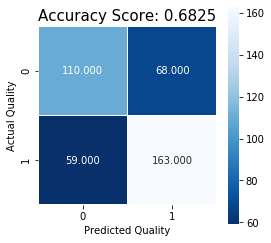

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y2_test, y2_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Quality');
plt.xlabel('Predicted Quality');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y2_test, y2_pred))
plt.title(all_sample_title, size = 15);

## Compute average training duration and accuracy score over 100 runs for K-NN with PCA (6 components) and k = 5

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def knnPCA6():
    begin_time = datetime.datetime.now()
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 42,test_size=0.25)

    knn2_model = KNeighborsClassifier(n_neighbors = 5) 
    knn2_model.fit(X2_train, y2_train) 
    
    y2_pred = knn2_model.predict(X2_test)
    accuracy = accuracy_score(y2_test, y2_pred)
    timespent = datetime.datetime.now()-begin_time
    return accuracy, timespent

runs = 100 #to loop through and get average timing to be more accurate
totaltime = datetime.timedelta()
totalaccuracy =0.00
for i in np.arange(0, runs, 1):
    i, j = knnPCA6()
    totaltime = totaltime + j
    totalaccuracy = totalaccuracy + i   

print('Average Accuracy Score for K-NN with PCA (6 components) and k = 5: ', totalaccuracy/runs)
print('Average Training Duration for K-NN with PCA (6 components) and k = 5: ', totaltime/runs)

Average Accuracy Score for K-NN with PCA (6 components) and k = 5:  0.6824999999999993
Average Training Duration for K-NN with PCA (6 components) and k = 5:  0:00:00.021161
